# SWMAL Exercise


## Performance Metrics

There are a number of frequently uses metrics in ML, namely accuracy, precision, recall and the $F_1$ score. All are called _metrics_ (though they are not true norms, like ${\cal L}_2$ or ${\cal L}_1$ we saw last time).

Maybe performance _score_ would be a better name than performance metric, at least for the accuracy, precision, recall we will be looking at---emphasising the conceptual distinction between the  _score-function_ and _cost(/loss/error/objective)-function_ (the later is typically a true distance/norm function).  

You can find a lot of details on say precision and recall in Wikipedia

>  https://en.wikipedia.org/wiki/Precision_and_recall


### Nomenclature

| NAME | SYMBOL | ALIAS |
| :---: | :---: | :---: |
|true positives | $TP$ | |
|true negatives | $TN$ | |
|false positives| $FP$ | type I error| 
|false negatives| $FN$ | type II error |

and $N = N_P + N_N$ being the total number of samples and the number of positive and negative samples
respectively.

### Precision

$$
\def\by{\mathbf{y}}
\def\ba{\begin{array}{lll}}
\def\ea{\end{array}}
\newcommand{\rem}[1]{}
\newcommand\st[1]{_{\scriptsize #1}}
\newcommand\myfrac[2]{\frac{#1\rule{0pt}{8pt}}{#2\rule{0pt}{8pt}}} 
\ba
 p &= \myfrac{TP}{TP + FP}
\ea
$$

### Recall or Sensitivity

$$
  \ba
    r &= \myfrac{TP}{TP + FN}\\
      &= \myfrac{TP}{N_P}
  \ea
$$

### Accuracy

$$
  \ba
      a &= \myfrac{TP + TN}{TP + TN + FP + FN}\\
        &= \myfrac{TP + TN}{N}\\
        &= \myfrac{TP + TN}{N_P~~ + N_N} 
  \ea
$$

#### Accuracy Paradox

A static constant model, say $p\st{cancer}=0$ may have higher accuracy than a real model with predictive power. This is odd!

Asymmetric weights could also be associated with the false positive and false negative predictions, yielding either FP of FN much more expensive than the other. Say, it is more expensive not to treat a person with cancer, than treating a person without cancer. 

### F-score

General $\beta$-harmonic mean of the precision and recall 
$$
    F_\beta = (1+\beta^2) \myfrac{pr}{\beta^2 p+r}\\
$$ 
that for say $\beta=2$ or $\beta=0.5$ shifts or skews the emphasis on the two variables in the equation. Normally only the $\beta=1$ harmonic mean is used

$$
  \ba
    F_1 &= \myfrac{2pr}{p+r}\\
        &= \myfrac{2}{1/p + 1/r}
  \ea
$$
with $F$ typically being synonymous with $F_1$. 

If needed, find more info on Wikipedia

> https://en.wikipedia.org/wiki/F1_score


## Confusion Matrix

For statistical classification, the confusion matrix or error matrix (or
matching matrix in unsupervised learning) is for a two-class problem given by
the $2\times2$ matrix with dimensions 'actual' and 'predicted'

$$   
{\bf M}\st{confusion} = 
\begin{array}{l|ll}
                           & \mbox{actual true} & \mbox{actual false} \\ \hline
    \mbox{predicted true}  & TP & FP \\     
    \mbox{predicted false} & FN & TN 
\end{array}
$$

The diagonal, in the square matrix, represent predicted values being the same
as the actual values, off-diagonal elements represent erroneous prediction.

Also notice, that the layout of this matrix is different of what is given in [HOML], "Confusion Matrix", p.110/fig 3-3. This is just a minor issue, since we can always flip/rotate/transpose the matrix (say by flipping the $\by\st{true}$ and $\by\st{pred}$ arguments). 

For N-class classification the matrix gives a matrix with $N$ actual
classes and $N$ predicted classes

$$
{\bf M}\st{confusion}~~~ =
  \left[
  \begin{array}{llll}
       c_{11} & c_{12} & \cdots & c_{1n} \\ 
       c_{21} & c_{22} & \cdots & c_{2n} \\
       \vdots & \vdots & \ddots & \vdots \\
       c_{n1} & c_{n2} & \cdots & c_{nn} \\ 
  \end{array}
  \right]
$$
with say element $c_{21}$ being the number of actual classes '1' being predicted (erroneously) as class '2'.

### Nomenclature for the Confusion Matrix

The naming of the elements in the confusion matrix can be rather exotic, like _false omission rate_ (see the figure below), but we won't get to such detail here...let us stick with TP, TN, FP, FN and $F_1$!

<img src="https://itundervisning.ase.au.dk/SWMAL/L02/Figs/performance_metrics.jpg" alt="WARNING: could not get image from server" style="width:900px">

If you need more info on the confusion matrix:

>  https://en.wikipedia.org/wiki/Confusion_matrix

#### Qa Implement the Accuracy function and test it on the MNIST data.

We now follow the convention in Scikit-learn, that a score funtion takes the arguments `y_true` and then `y_pred`

```
    sklearn.metrics.accuracy_score(y_true, y_pred, ..)
```

Implement a general accuracy function `MyAccuracy(y_true, y_pred)`. Again, implement the function you self from scratch, i.e. do not use any helper functions from Scikit-learn (implementing via `sklearn.metrics.confusion_matrix` is also not allowed, othewise you will then learn nothing!)

Reuse your MNIST data loader and test the `MyAccuracy` function  both on your dummy classifier and on the Stochastic Gradient Descent classifier (with setup parameters as in [HOML]).

Compare your accuracy score with the acutal value from `sklearn.metrics.accuracy_score()`.

(Implementation note: what do you do, if the denominator is zero?)

c:\Users\oscar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Number of samples: 70000
Label of the digit: 4


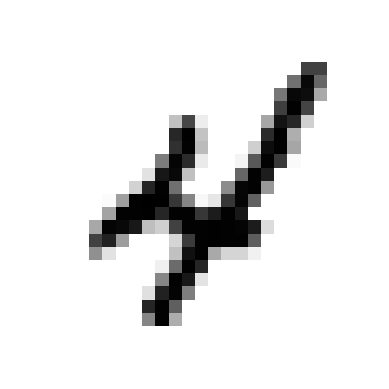

In [41]:
from sklearn.datasets import fetch_openml
import matplotlib
import matplotlib.pyplot as plt

# Function to fetch the MNIST dataset
def MNIST_GetDataSet():
    X,y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame = False)
    return X,y


# Function to plot a digit
%matplotlib inline
def MNIST_PlotDigit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = matplotlib.cm.binary, interpolation="nearest")
    plt.axis("off")

# Fetches X and y
X,y = MNIST_GetDataSet()

#Convert to [0;1] via scaling
X = X / 255.

#Check if data is loaded
print("Number of samples:", len(X))


digit_to_plot = X[9]  # The index is 9 for the 10th digit (0-based index)

#Check what number the image is representing
print("Label of the digit:", y[9])

MNIST_PlotDigit(digit_to_plot)


X.shape=(70000, 784)
Predicted Label: False


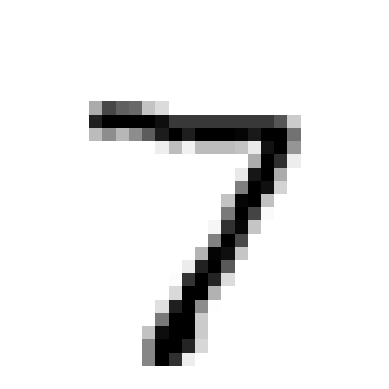

Predicted Label: False


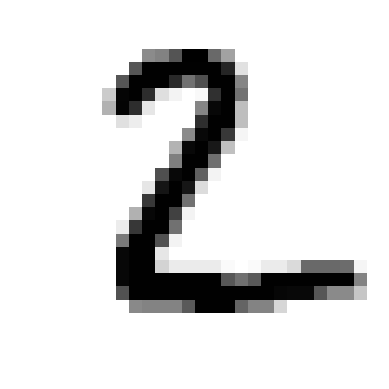

Predicted Label: False


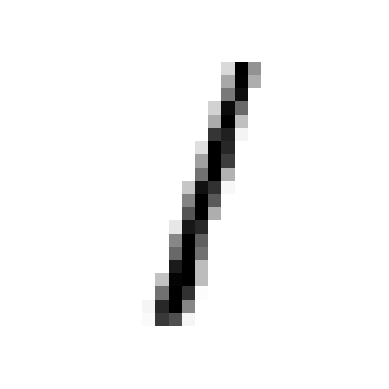

In [42]:
# TODO: add your code here..
import numpy as np
from sklearn.linear_model import SGDClassifier

#reshapes X to 2D array if not already
if X.ndim==3:
    print("reshaping X..")
    assert y.ndim==1
    X = X.reshape((X.shape[0],X.shape[1]*X.shape[2]))
assert X.ndim==2
print(f"X.shape={X.shape}") # X.shape= (70000, 784)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# Create binary target variable y_train_5 with the digit '5' as true
y_train_5 = (y_train == '5')   # True for all 5s, False for all other digits
# Create binary target variable for the testing set
y_test_5  = (y_test == '5')

# Create a SGDClassifier which will classify if a digit is a 5 or not
sgd_clf = SGDClassifier(random_state=42)

# Train the classifier using the training data
sgd_clf.fit(X_train, y_train_5)

y_pred = sgd_clf.predict(X_test)

classified_numbers = np.where(y_pred == y_test_5)[0]

for number in classified_numbers[:3]:
    MNIST_PlotDigit(X_test[number])
    # Predict if the digit is a 5 or not
    prediction = sgd_clf.predict([X_test[number]])  # Provide the data sample
    print(f"Predicted Label: {prediction[0]}")
    plt.show()


In [56]:
# TODO: Qa...

#from sklearn.base import accuracy_score


from sklearn.metrics import accuracy_score


def MyAccuracy(y_true, y_pred):
    if len(y_true)==0 or len(y_pred)==0:
        return 0
    y_correctPred=[]
    for i in range(len(y_true)):
        if y_true[i]==y_pred[i]:
            y_correctPred.append(y_pred[i])
    return len(y_correctPred)/len(y_true)


    
# TEST FUNCTION: example of a comperator, using Scikit-learn accuracy_score
def TestAccuracy(y_true, y_pred):
    if len(y_true) != len(y_pred):
      print("Error: Input arrays have different lengths.")
      return
    a0=MyAccuracy(y_true, y_pred)
    a1=accuracy_score(y_true, y_pred)

    print(f"\nmy a          ={a0}")
    print(f"scikit-learn a={a1}")

TestAccuracy([1,2,3,4], [1,2,3,3])

TestAccuracy(y_test_5, y_pred)
#    # do some numerical comparison here, like
#    #  if fabs(a0-a1)<eps then ..


my a          =0.75
scikit-learn a=0.75

my a          =0.9769
scikit-learn a=0.9769


#### Qb Implement Precision, Recall and $F_1$-score and test it on the MNIST data for both the SGD and Dummy classifier models

Now, implement the `MyPrecision`, `MyRecall` and `MyF1Score` functions, again taking MNIST as input, using the SGD and the Dummy classifiers and make some test vectors to compare to the functions found in Scikit-learn...

(Implementation note: as before, what do you do, if the denominator is zero?)

In [57]:
# TODO: Qb..
import sklearn.metrics as metrics
def MyPrecision(y_true, y_pred):
    #predicted correct positive
    pcp = [item for item in y_pred if item == True]
    y_correctPred=[]
    for i in range(len(y_true)):
        if y_true[i]==True and y_pred[i]==True:
            y_correctPred.append(y_pred[i])
    return len(y_correctPred)/len(pcp)

def TestPrecision(y_true, y_pred):
    if len(y_true) != len(y_pred):
      print("Error: Input arrays have different lengths.")
      return
    p0=MyPrecision(y_true, y_pred)
    p1=metrics.precision_score(y_true, y_pred)

    print(f"\nmy p        ={p0}")
    print(f"scikit-learn p={p1}")

TestPrecision([True,True,False,True], [True,True,True,False])
TestPrecision(y_test_5, y_pred)


def MyRecall(y_true, y_pred):
    #condition positive
    cp = [item for item in y_true if item == True]
    y_correctPred=[]
    for i in range(len(y_true)):
        if y_true[i]==True and y_pred[i]==True:
            y_correctPred.append(y_pred[i])
    return len(y_correctPred)/len(cp)

def TestRecall(y_true, y_pred):
    if len(y_true) != len(y_pred):
      print("Error: Input arrays have different lengths.")
      return
    r0=MyRecall(y_true, y_pred)
    r1=metrics.recall_score(y_true, y_pred)

    print(f"\nmy r        ={r0}")
    print(f"scikit-learn r={r1}")

TestRecall([True,True,True,True], [True,True,True,False])
TestRecall(y_test_5, y_pred)
    
def MyF1Score(y_true, y_pred):
    p = MyPrecision(y_true, y_pred)
    r = MyRecall(y_true, y_pred)
    return 2/((1/p)+(1/r))

def TestF1Score(y_true, y_pred):
    if len(y_true) != len(y_pred):
      print("Error: Input arrays have different lengths.")
      return
    f0=MyF1Score(y_true, y_pred)
    f1=metrics.f1_score(y_true, y_pred)

    print(f"\nmy f        ={f0}")
    print(f"scikit-learn f={f1}")

TestF1Score([True,True,True,True], [True,True,True,False])
TestF1Score(y_test_5, y_pred)


my p        =0.6666666666666666
scikit-learn p=0.6666666666666666

my p        =0.9460188933873145
scikit-learn p=0.9460188933873145

my r        =0.75
scikit-learn r=0.75

my r        =0.7858744394618834
scikit-learn r=0.7858744394618834

my f        =0.8571428571428572
scikit-learn f=0.8571428571428571

my f        =0.8585425597060624
scikit-learn f=0.8585425597060625


#### Qc The Confusion Matrix

Revisit your solution to Qb in the `dummy_classifier.ipynb`. Generate the confusion matrix for both the Dummy and the SGD classifier using the `scklearn.metrics.confusion_matrix` function. 

I got the two confusion matrices

```
M_dummy=[[18166     0]
        [ 1834     0]]
   
M_SDG=[[17618   548]
      [  267  1567]]

```
your data may look similar (but not 100% equal).

How are the Scikit-learn confusion matrix organized, where are the TP, FP, FN and TN located in the matrix indices, and what happens if you mess up the parameters calling

```python
confusion_matrix(y_test_5_pred, y_test5)
```

instead of 
```python
confusion_matrix(y_test_5, y_test_5_pred)
```

In [ ]:
# TODO: Qc
assert False, "TODO: solve Qc, and remove me..

#### Qd A Confusion Matrix Heat-map

Generate a _heat map_ image for the confusion matrices, `M_dummy` and `M_SGD` respectively, getting inspiration from [HOML] "Error Analysis", pp.122-125.

This heat map could be an important guide for you when analysing multiclass data in the future.

In [ ]:
# TODO: Qd
assert False, "TODO: solve Qd, and remove me..

### Qe Conclusion

Now, conclude on all the exercise above. 

Write a short textual conclusion (max. 10- to 20-lines) that extract the _essence_ of the exercises: why did you think it was important to look at these particular ML concepts, and what was our overall learning outcome of the exercises (in broad terms).

In [ ]:
# TODO: Qe concluding remarks in text..

REVISIONS||
:- | :- |
2018-12-19| CEF, initial.
2018-02-07| CEF, updated.
2018-02-07| CEF, rewritten accuracy paradox section.
2018-03-05| CEF, updated with SHN comments.
2019-09-01| CEF, updated for ITMAL v2.
2019-09-04| CEF, updated for print-f and added conclusion Q.
2020-01-25| CEF, F20 ITMAL update.
2020-02-03| CEF, minor text fixes.
2020-02-04| CEF, updated page numbers to HOMLv2.
2020-02-17| CEF, added implementation note on denominator=0.
2020-09-03| CEF, E20 ITMAL update, udpated figs paths.
2020-09-06| CEF, added alt text.
2020-09-07| CEF, updated HOML page refs.
2020-09-21| CEF, fixed factor 2 error in beta-harmonic.
2021-01-12| CEF, F21 ITMAL update, moved revision tabel.
2021-08-02| CEF, update to E21 ITMAL.
2022-01-25| CEF, update to F22 STMAL.
2023-02-07| CEF, update HOML page numbers.
2023-02-09| CEF, chagned y_train to y_test in conf. matrix call.
2023-08-30| CEF, minor table change.